In [4]:
%matplotlib inline

import random as rd

import numpy as np
from keras.applications import VGG16
from keras.layers.convolutional import Conv2D
from keras.layers import Input, InputLayer
from keras.layers.convolutional import MaxPooling2D
from keras.layers.pooling import GlobalMaxPooling2D
from keras.layers import Dense
from keras.models import Model
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)

In [5]:
# Custurmize VGG16 Network as Grayscale, 1024 Fully Connected

mdl_original = VGG16(classes=4, include_top=False,  pooling='Max', input_shape=(240,280,3))

layer1_wb = mdl_original.layers[1].get_weights()

layer1_w = layer1_wb[0]
layer1_w_newshape = list(layer1_w.shape)
layer1_w_newshape[2] = 1
layer1_w_newshape = tuple(layer1_w_newshape)

layer1_w_new = np.zeros(layer1_w_newshape)
layer1_w_new[:,:,0,:] = np.mean(layer1_w, axis=2)

layer1_new = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', name='block1_conv1')


layer1_wb_new = layer1_wb
layer1_wb_new[0] = layer1_w_new


img_input = Input(shape=(240,280,1))
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1',use_bias=True)(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)
x = GlobalMaxPooling2D()(x)

# Block 6
x = Dense(1024, activation='relu', name='fc1')(x)
x = Dense(1024, activation='relu', name='fc2')(x)
x = Dense(4, activation='softmax', name='predictions')(x)

mdl = Model(img_input, x)

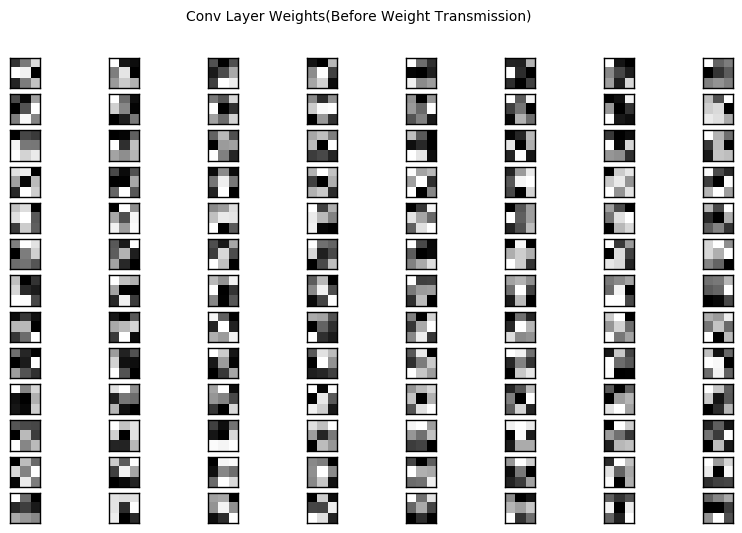

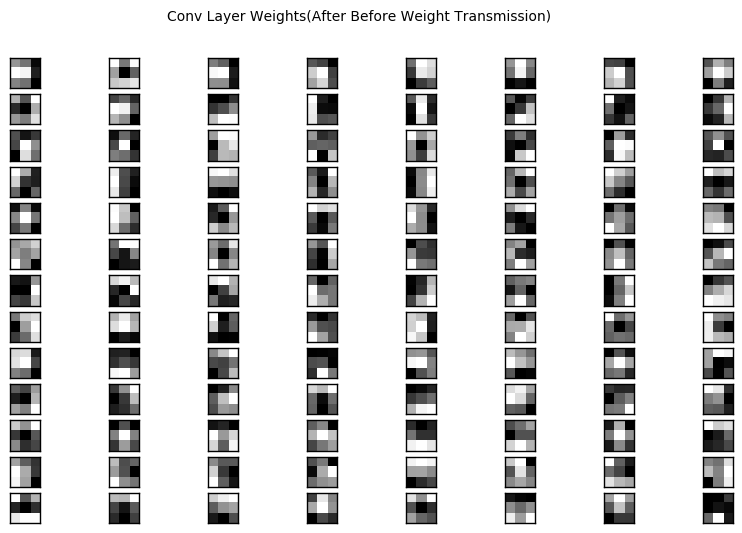

In [6]:
# This is for Visualization
plt.close('all')
samp_indices = [ rd.randint(a=0, b=64) for i in range(1,8+1) ]
conv_indices = [1,2,4,5,7,8,9,11,12,13,15,16,17]


# Before Weight Transmission
cnt = 1
plt.figure()
for c_i in conv_indices:
    for s_i in samp_indices:
        plt.subplot(len(conv_indices), 8, cnt)
        plt.imshow(mdl.layers[c_i].get_weights()[0][:,:,0,s_i], interpolation='nearest', cmap='gray')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        cnt = cnt + 1
plt.suptitle('Conv Layer Weights(Before Weight Transmission)')

# Re Initializing
mdl.layers[1].set_weights(layer1_wb_new)

for idx_layer, layer in enumerate(mdl_original.layers[2:]):
    mdl.layers[idx_layer+2].set_weights(layer.get_weights())

# After Weight Transmission
cnt = 1
plt.figure()
for c_i in conv_indices:
    for s_i in samp_indices:
        plt.subplot(len(conv_indices), 8, cnt)
        plt.imshow(mdl.layers[c_i].get_weights()[0][:,:,0,s_i], interpolation='nearest', cmap='gray')
        plt.gca().set_xticks([])
        plt.gca().set_yticks([])

        cnt = cnt + 1
plt.suptitle('Conv Layer Weights(After Before Weight Transmission)')

In [7]:
# Save model after weight transfer
mdl.save('VGG16_Grayscale.hdf5')